## What is Neural Network

- The Biological Inspiration Behind Neural Networks: Neural networks are inspired by the structure of the human brain, where neurons are the basic functional units that process information. In the brain, neurons are interconnected, and signals travel through these connections. Similarly, artificial neurons (also called nodes) are connected through weighted links in a neural network. Each connection represents the "strength" or importance of a signal, just like in the brain.



- Overview of the Structure: Neurons, Layers, and Weights: A basic neural network is composed of layers:

    - Input Layer: The first layer where the input data is fed into the network.
    - Hidden Layers: Layers between the input and output layers where neurons perform intermediate calculations. These layers extract and learn features from the data.
    - Output Layer: The final layer that produces the network's prediction. Each connection between neurons is assigned a weight, which is adjusted during training to improve the model’s performance. Weights represent the importance of the signal passing between neurons.

- In this exercise, We build Basic Neural network
- As we know NNs are universal function approximator, we will use it to approximate sin function

In [13]:
import numpy as np 
import torch 
import torch.nn as nn 
import matplotlib.pyplot as plt

### Prepare Dataset

In [51]:
X = torch.linspace(-4*np.pi,4*np.pi,10000).view(-1,1)
X.shape

torch.Size([10000, 1])

In [49]:
Y = torch.sin(X) + 0.5 * torch.randn(len(X))
Y.shape

torch.Size([1, 10000])

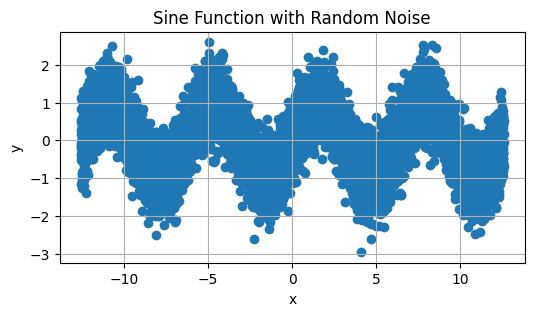

In [19]:
plt.figure(figsize=(6, 3))
plt.scatter(X.numpy(), Y.numpy())
plt.title("Sine Function with Random Noise")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

### Define Model Layers

In [40]:
class BasicNN(nn.Module):
    def __init__(self):
        super().__init__()
        # W = (in_feature,out_feature) b = out_feature
        self.layer_1 = nn.Linear(1,128) 
        # W = (1,128), b = 128 -> # params in L1 = 128*1 + 128 = 256
        self.layer_2 = nn.Linear(128,256)
        # W = (128,256), b = 256 -> # params in L2 = 128*256 + 256 = 33024
        self.layer_3 = nn.Linear(256,128)
        # W = (256,128), b = 128 -> # params in L3 = 128*256 + 128 = 32896
        self.output = nn.Linear(128,1)
        # W = (128,1), b = 1 -> # params in output = 128*1 + 1 = 129

    def forward(self,x):
        x = torch.relu(self.layer_1(x))
        x = torch.relu(self.layer_2(x))
        x = torch.relu(self.layer_3(x))
        x = self.output(x)
        return x

### Initialize Model Training

In [41]:
model = BasicNN()

In [42]:
model

BasicNN(
  (layer_1): Linear(in_features=1, out_features=128, bias=True)
  (layer_2): Linear(in_features=128, out_features=256, bias=True)
  (layer_3): Linear(in_features=256, out_features=128, bias=True)
  (output): Linear(in_features=128, out_features=1, bias=True)
)

In [43]:
sum([p.numel() for p in model.parameters() if p.requires_grad])

66305

### Train Model 

In [45]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [52]:
#training loop
num_epochs = 10000
for epoch in range(num_epochs):
  #forward pass
  outputs = model(X)
  loss = criterion(outputs, Y)
  optimizer.zero_grad()
  #BackProgation
  loss.backward()
  optimizer.step()

  if (epoch + 1) % 100 == 0:
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

c:\Users\VR679RX\OneDrive - EY\Documents\Projects\Projects - 2024\.venv\Lib\site-packages\torch\nn\modules\loss.py:538: UserWarning: Using a target size (torch.Size([1, 10000])) that is different to the input size (torch.Size([10000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [100/10000], Loss: 0.5000
Epoch [200/10000], Loss: 0.5000
Epoch [300/10000], Loss: 0.5000
Epoch [400/10000], Loss: 0.5000
Epoch [500/10000], Loss: 0.5000
Epoch [600/10000], Loss: 0.5000
Epoch [700/10000], Loss: 0.4999
Epoch [800/10000], Loss: 0.5000
Epoch [900/10000], Loss: 0.5000
Epoch [1000/10000], Loss: 0.5000
Epoch [1100/10000], Loss: 0.5000
Epoch [1200/10000], Loss: 0.5000
Epoch [1300/10000], Loss: 0.5000
Epoch [1400/10000], Loss: 0.5000
Epoch [1500/10000], Loss: 0.5000
Epoch [1600/10000], Loss: 0.5000
Epoch [1700/10000], Loss: 0.5000
Epoch [1800/10000], Loss: 0.5000
Epoch [1900/10000], Loss: 0.5000
Epoch [2000/10000], Loss: 0.5000
Epoch [2100/10000], Loss: 0.5000
Epoch [2200/10000], Loss: 0.5000


KeyboardInterrupt: 

## Inference and Visualize the Output

In [ ]:
# Test the trained model
with torch.no_grad():
    predicted = model(X)

# Plot the original function and the learned function
plt.figure(figsize=(6, 3))
plt.scatter(X.numpy(), Y.numpy(), color='blue', label='Original Function')
plt.plot(X.numpy(), predicted.numpy(), color='red', label='Learned Function')
plt.title("Original Function vs. Learned Function")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()